<a href="https://colab.research.google.com/github/lorek/MethodsClassDimRed/blob/main/MoCaDR_List_nr_1_good_practice_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Methods of classification and dimensionality reduction**


Paweł Lorek  
University of Wrocław

# LIST NR 1: A) Good practice in Python for Machine Learning; B) Sklearn -- basics

# A) Some good practice in Python for Machine Learning

In [ ]:
import numpy as np
import time

# Project Organization:
**IMPORTANT** -- we mention it here, but we do not practice it in Colab (it is much easier to practice it locally)

## Folder structure

Typical project structure:


  ```python

my_ml_project/
  ├── data/                 # Data files (CSV, images, etc.)
  ├── models/               # Python modules: classes and functions
  │   └── linear_regression.py
  │   └── my_functions.py
  │   └── my_utils.py
  ├── notebooks/            # Jupyter or Colab notebooks:experiments and demos
  ├── tests/                # Unit tests for your modules
  ├── main.py               # The main script to run your project
  ├── README.md             # Project documentation
  └── requirements.txt      # List of project dependencies
  ```



## Modularity
Divide project into models. E.g., say this is `my_ml_project/models/my_functions.py`:

  ```python
def sum_of_squares(n: int) -> int:
    """
    Compute the sum of squares of numbers from 1 to n.
    """
    if n < 1:
        raise ValueError("n must be at least 1.")
    return sum(i ** 2 for i in range(1, n + 1))
  ```

Then, say in `my_ml_project/main.py` we may have:
  ```python
from models.my_utils import sum_of_squares
print("Sum of squares for n=5:", sum_of_squares(5))
  ```


# Classes in Machine Learning: Implementing Fit & Predict

In modern machine learning, it’s common to encapsulate models as classes with methods such as .fit() and .predict(). This approach organizes the code, makes it reusable, and closely mirrors how popular libraries (like `scikit-learn`) are structured.

## 1D Linear Regression: Fit and Predict

In this section, we focus on a simple 1D Linear Regression problem. We are given data points
$$(x_1,y_1),\ldots,(x_n,y_n)$$
where each $x_i \in \mathbb{R}$, and our goal is to estimate parameters $\beta_0$ (the intercept) and $\beta_1$ (the slope) such that the model

$$
y = \beta_0 + \beta_1 x
$$

"best" fits the data in a least-squares sense. By "best" we mean that the parameters minimize the loss function

$$
h(\beta_0,\beta_1)=\sum_{i=1}^n \Bigl(y_i-(\beta_0+\beta_1 x_i)\Bigr)^2.
$$

Thus, we want

$$
\beta_0,\beta_1 = \arg\min_{\beta_0,\beta_1} h(\beta_0,\beta_1).
$$

To derive the minimizers, we compute the partial derivatives of \(h\) with respect to \(\beta_0\) and \(\beta_1\):

$$
\frac{\partial h}{\partial \beta_0} = \sum_{i=1}^n 2\Bigl(\beta_0+\beta_1 x_i - y_i\Bigr)
$$

$$
\frac{\partial h}{\partial \beta_1} = \sum_{i=1}^n 2\Bigl(\beta_0+\beta_1 x_i - y_i\Bigr)x_i.
$$

Setting these derivatives to zero yields the normal equations. After some algebra, the optimal parameters are given by:

$$
\beta_1 = \frac{\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n (x_i-\bar{x})^2}, \qquad \beta_0 = \bar{y} - \beta_1 \bar{x},
$$

where

$$
\bar{x}=\frac{1}{n} \sum_{i=1}^n x_i,\qquad
\bar{y}=\frac{1}{n} \sum_{i=1}^n y_i.
$$




### 1D Linear Regression -- implementation

Using above formula we have the following implementation:

In [ ]:

class myLinearRegression1D:
    """
    A simple 1D linear regression model using the closed-form solution.

    The model is: y = beta0 + beta1 * x.

    The parameters are estimated as:
      beta1 = sum((x_i - \hat{x})(y_i - \hat{y}) / sum((x_i - \hat{x})^2)
      beta0 = \hat{y} - beta1 * \hat{x},

    where:
      \hat{x}= (1/n) * sum(x_i) and \hat{y}= (1/n) * sum(y_i)
    """

    def __init__(self):
        self.beta0 = None
        self.beta1 = None

    def fit(self, X, y):
        """
        Fit the linear regression model using the direct formula.

        Parameters:
            X (array-like): 1D array or column vector of input features.
            y (array-like): 1D array or column vector of target values.
        """
        # Ensure X and y are 1D arrays
        X = np.ravel(X)
        y = np.ravel(y)

        n = len(X)
        x_bar = np.mean(X)
        y_bar = np.mean(y)

        # Compute the slope (beta1)
        beta1_num = np.sum((X - x_bar) * (y - y_bar))
        beta1_den = np.sum((X - x_bar)**2)
        self.beta1 = beta1_num / beta1_den

        # Compute the intercept (beta0)
        self.beta0 = y_bar - self.beta1 * x_bar

    def predict(self, X):
        """
        Predict target values using the fitted model.

        Parameters:
            X (array-like): 1D array or column vector of input features.

        Returns:
            np.ndarray: Predicted values.
        """
        X = np.ravel(X)
        return self.beta0 + self.beta1 * X


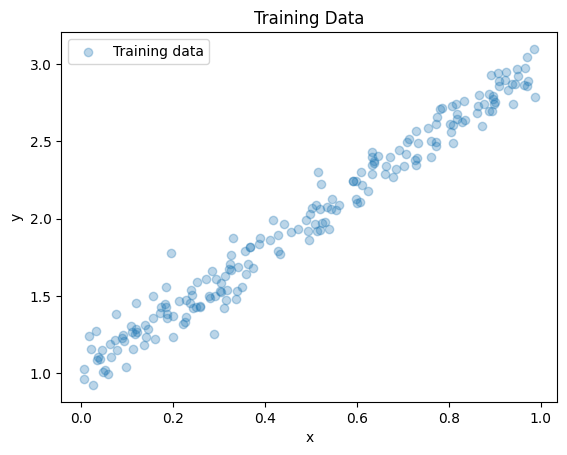

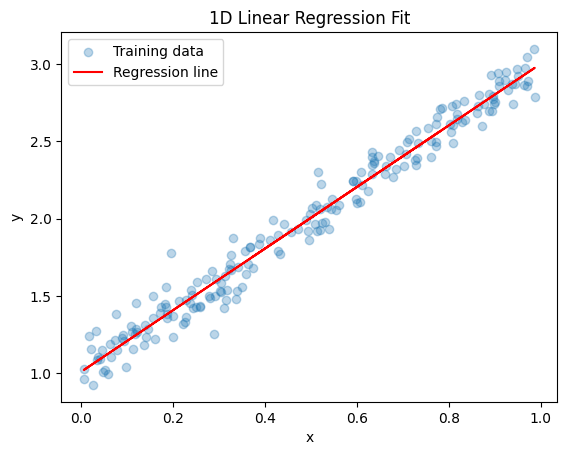

Estimated intercept: 1.011
Estimated slope: 1.992


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Generate synthetic 1D data
nr_points = 200
np.random.seed(42)
x_train = np.random.rand(nr_points, 1)

# True parameters
a_true = 2  # slope
b_true = 1  # intercept
y_train = b_true + a_true * x_train + 0.1 * np.random.randn(nr_points, 1)

# Visualize the training data
plt.scatter(x_train, y_train, alpha=0.3, label='Training data')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Training Data")
plt.legend()
plt.show()

# Create and train the model
model = myLinearRegression1D()
model.fit(x_train, y_train)

# Predict on the training data
y_pred = model.predict(x_train)

# Plot the regression line
plt.scatter(x_train, y_train, alpha=0.3, label='Training data')
plt.plot(x_train, y_pred, color='red', label='Regression line')
plt.xlabel("x")
plt.ylabel("y")
plt.title("1D Linear Regression Fit")
plt.legend()
plt.show()

print(f"Estimated intercept: {model.beta0:.3f}")
print(f"Estimated slope: {model.beta1:.3f}")


In [ ]:
x_train.shape

(200, 1)

In [ ]:
x_vec = x_train.ravel()
print(x_vec.shape)

(200,)


Compare results with `LinearRegression` from `sklearn`:
(there may be minor differences resulting from rounding and numerical precision)


In [ ]:
from sklearn.linear_model import LinearRegression

# Fit scikit-learn model
sk_model = LinearRegression()
sk_model.fit(x_train, y_train)

print("\nScikit-learn Model Parameters:")
print("Intercept (beta0):", sk_model.intercept_[0])
print("Slope (beta1):", sk_model.coef_[0])


Scikit-learn Model Parameters:
Intercept (beta0): 1.0105201150960823
Slope (beta1): [1.99219289]


# Q1.1 Multidimensional Linear Regression


Given a dataset
$$
\{ (\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), \ldots, (\mathbf{x}_n, y_n) \},
$$
where each input vector $\mathbf{x}_i \in \mathbb{R}^d$ and the corresponding target $y_i \in \mathbb{R}$, we wish to model the relationship between $\mathbf{x}_i$ and $y_i$ using a linear model.

### Model Formulation

We assume the model is given by
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_d x_d,
$$
or, equivalently, in vector notation:
$$
y = \beta_0 + \mathbf{x}^T \boldsymbol{\beta},
$$
where $\boldsymbol{\beta} = (\beta_1, \beta_2, \ldots, \beta_d)^T$ and $\mathbf{x}=(x_1,\ldots,x_d)^T$.

To include the intercept in the formulation, we augment the input vector with a constant 1, and define
$$
\mathbf{X} = \begin{bmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1d} \\
1 & x_{21} & x_{22} & \cdots & x_{2d} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{n1} & x_{n2} & \cdots & x_{nd}
\end{bmatrix} \quad \textrm{and}\quad
\boldsymbol{\theta} = \begin{bmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_d \end{bmatrix}.
$$

The closed-form solution (normal equation) for the parameters is then given by
$$
\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}\mathbf{X}^T \mathbf{y},
$$
where $\mathbf{y} = (y_1, y_2, \ldots, y_n)^T$.


**Note:**  
- Ensure that the input data is appropriately augmented with a column of ones to account for the intercept.
- You may use NumPy for the matrix operations.

*Hint:*  
You can augment the input matrix `X` (which is of shape `(n_samples, d)`) as follows:

```python
X_augmented = np.c_[np.ones((X.shape[0], 1)), X]
```

## Q1.1 a)

Implement a Python class called `myLinearRegression_multiD` with the following methods:

1. **`fit(X, y)`**:  
   Compute the parameter vector $\hat{\theta}$ using the closed-form solution and store it as an attribute.

2. **`predict(X)`**:  
   Use the stored parameters to compute predictions for new input data.

## Q1.1 b)
First, **double-check your implementation** by applying your `myLinearRegression_multiD` class to the previous 1D example.  
- Verify that for the dataset
  $$
  \{(x_1,y_1),\ldots,(x_n,y_n)\},
  $$
  where each $x_i\in\mathbb{R}$, your implementation returns similar parameters to those computed using `myLinearRegression1D` and/or function from `sklearn`.



## Q1.1 c)
Consider 2d points  $\mathbf{x}_i\in\mathbb{R}^2$ generated by the following code (note that we have $(\mathbf{x}_i,y_i)=((x_{i1},x_{i2}), y_i)$ -- in the plot below $y_i$ is represented as $z$-coordinates.

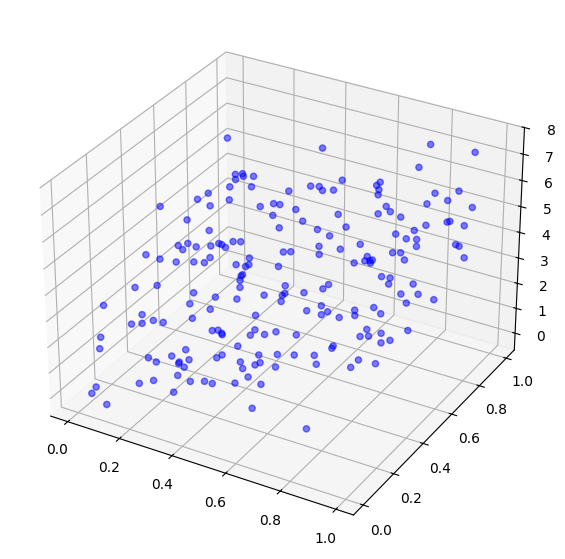

In [ ]:
# Generate synthetic data for 2D input
np.random.seed(42)
n_points = 200
# Each x_i is in R^2, with features uniformly sampled in [0, 1]
X_2d = np.random.rand(n_points, 2)

# Define true parameters for the model: y = beta0 + beta1*x1 + beta2*x2
beta0_true = 1.0
beta1_true = 2.0
beta2_true = 3.0

# Generate target values with some Gaussian noise
y_2d = beta0_true + beta1_true * X_2d[:, 0] + beta2_true * X_2d[:, 1] + 1 * np.random.randn(n_points)

# 3D Visualization: Plot the data points and the regression plane
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data points
ax.scatter(X_2d[:, 0], X_2d[:, 1], y_2d, color='blue', alpha=0.5, label='Data points')

Thus, `.fit` method of your implementation would return 3 parameters: $\beta_0, \beta_1, \beta_2$.
* create a grid over (x_1,x_2)-space, predict the $y$-values on this grid
* plot a regression plane (a surface) corresponding to these predictions on the top of the scatter plot.
This should work:
```python
x1_grid, x2_grid = np.meshgrid(np.linspace(0, 1, 20), np.linspace(0, 1, 20))
X_grid = np.column_stack((x1_grid.ravel(), x2_grid.ravel()))
y_grid = model.predict(X_grid).reshape(x1_grid.shape)
#Plot the surface
ax.plot_surface(x1_grid, x2_grid, y_grid, color='red', alpha=0.5)
```
* Rotate the plot using `ax.view_init(elev, azim)` to display the regression plane clearly.

## Q1.1 d)

 Below code samples generate synthetic data with 200 points in a 100-dimensional space. The target values $y$ are computed using a known linear model with a fixed intercept and randomly generated coefficients, plus Gaussian noise.

In [ ]:
# Generate synthetic data for the 100D case
n_samples = 200
n_features = 100
np.random.seed(42)

# Generate random features from a standard normal distribution
X_100d = np.random.randn(n_samples, n_features)

# Define true parameters
true_intercept = 3.0
true_coef = np.random.randn(n_features)

# Generate target values with some Gaussian noise
y_100d = true_intercept + X_100d.dot(true_coef) + 0.5 * np.random.randn(n_samples)



Fit your `LinearRegression_multiD` implementation and `scikit-learn`'s `LinearRegression` on this dataset, then compute and report the L2 norm of the difference between the recovered parameter vectors (with intercept included).

# B) Sklearn -- basics

## Mean Squared Error and `.score()`

Mean Squared Error (MSE) is a common metric for regression models, representing the average squared difference between predicted $\hat{y_1},\ldots,\hat{y_n}$ and   actual $y_1,\ldots,y_n$ values, namely
$$\textrm{MSE} = {1\over n}\sum_{i=1}^n (y_i-\hat{y}_i)^2.$$
In scikit-learn, you can compute MSE using the `mean_squared_error` function. Additionally, most `scikit-learn` regression models provide a `.score()` method that returns the coefficient of  determination $R^2$, a measure of how well the model explains the variability of the response data:
$$R^2=1-{\sum_{i=1}^n(y_i-\hat{y}_i)^2\over \sum_{i=1}^n(y_i-\bar{y})^2}, \quad \textrm{where} \bar{y}={1\over n}\sum_{i=1}^n y_i.$$

In [ ]:
from sklearn.metrics import mean_squared_error

# Generate synthetic data for regression
np.random.seed(42)
X = np.random.rand(100, 1) # X is of shape (100,1)
# X.ravel() is of shape (100,)
y = 3 + 2 * X.ravel() + np.random.randn(100) * 0.5  # y = 3 + 2x + noise

# Fit a Linear Regression model
model = LinearRegression()
model.fit(X, y) #
y_pred = model.predict(X)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

# Compute R^2 score using the model's .score() method
r2 = model.score(X, y)
print("R^2 Score:", r2)

Mean Squared Error: 0.20164614099176328
R^2 Score: 0.5765250608765804


## Some known datasets, train_test_split, KFold Cross Validation

The `Diabetes` dataset is a  a well-known regression dataset in scikit-learn. It contains 10dimensional points $\mathbf{x}_i$ together with real-valued $y_i\in\mathbb{R}$ (this target value is a quantitative measure of disease progression one year after the baseline).

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.datasets import load_diabetes

# Load the Diabetes dataset
data = load_diabetes()
X = data.data
y = data.target

print("Data of shape: X.shape=",X.shape, ", y.shape = ", y.shape)

Data of shape: X.shape= (442, 10) , y.shape =  (442,)


Split the data (randomly) into two sets: so-called training (0.8 of all data) and testing set (remaining 0.2):

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (353, 10)
X_test shape: (89, 10)


In [ ]:
model = LinearRegression()

# Create and train the LinearRegression model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Compute the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Test set Mean Squared Error:", mse)



Test set Mean Squared Error: 2900.193628493482


We split the set randomly... repeat it several times, let's see differences between splits:

In [ ]:
for i in np.arange(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  print("seed = ", i , ", test set Mean Squared Error:", mse)

seed =  0 , test set Mean Squared Error: 3424.259334298692
seed =  1 , test set Mean Squared Error: 2992.5812293010176
seed =  2 , test set Mean Squared Error: 3094.4566715660626
seed =  3 , test set Mean Squared Error: 3161.213140359926
seed =  4 , test set Mean Squared Error: 2939.3581883941433
seed =  5 , test set Mean Squared Error: 2981.5873043126107
seed =  6 , test set Mean Squared Error: 2959.2256395630016
seed =  7 , test set Mean Squared Error: 2966.049506689707
seed =  8 , test set Mean Squared Error: 2937.8713184385324
seed =  9 , test set Mean Squared Error: 2257.798900123449


**KFold Cross-Validation** (simplified description): KFold splits the dataset into $k$ k equally sized folds (or as equal as possible). In each iteration, one fold is used as the validation set and the remaining $k-1$ folds as the training set. This process is repeated $k$
k times (with each fold used once for validation), and the model performance is averaged over all folds. This approach helps assess the model's generalizability.

In [ ]:
from sklearn.model_selection import KFold

# Create a KFold object with k=5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores = []

# Iterate over each fold
for fold, (train_index, test_index) in enumerate(kf.split(X), start=1):
    print(f"Fold {fold}:")
    print("  Training indices:", train_index[:5], "...")
    print("  Testing indices: ", test_index[:5], "...\n")

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create and train the model on the training set
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on the test set and calculate MSE
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"Fold {fold} MSE: {mse:.2f}")

print("Average MSE across folds:", np.mean(mse_scores))

Fold 1:
  Training indices: [1 2 3 4 5] ...
  Testing indices:  [ 0  9 11 15 19] ...

Fold 1 MSE: 2900.19
Fold 2:
  Training indices: [0 1 2 4 6] ...
  Testing indices:  [ 3  5  7 16 17] ...

Fold 2 MSE: 2662.64
Fold 3:
  Training indices: [0 1 3 4 5] ...
  Testing indices:  [ 2  6 10 23 37] ...

Fold 3 MSE: 3312.31
Fold 4:
  Training indices: [0 1 2 3 5] ...
  Testing indices:  [ 4  8 12 14 27] ...

Fold 4 MSE: 2797.88
Fold 5:
  Training indices: [0 2 3 4 5] ...
  Testing indices:  [ 1 13 20 21 34] ...

Fold 5 MSE: 3403.89
Average MSE across folds: 3015.381694287271


You can **achieve the same** using `cross_val_score` in just a few lines:

In [ ]:
from sklearn.model_selection import cross_val_score

model = LinearRegression()
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
print("Cross-validated MSE scores:", np.round(-cv_scores,2))
print("Average CV MSE:", -cv_scores.mean())

Cross-validated MSE scores: [2900.19 2662.64 3312.31 2797.88 3403.89]
Average CV MSE: 3015.381694287271


Note:
* We use `scoring='neg_mean_squared_error'` because scikit-learn expects higher scores to be better, so it returns the negative MSE.
* We used `KFold` object `kf` earlier defined as
```python
kf = KFold(n_splits=k, shuffle=True, random_state=42)
```
We may skip this and pass number of folds directly (i.e., `cv=5` instead of `cv=kf`:
```python
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
```
However, the results might differ since in that case, you do not have control over the randomness (seed) used for the splits.


Note that `myLinearRegression1D` implemented earlier cannot be used within `cross_val_score` as it is:




In [ ]:
x_train = np.random.rand(200, 1)

# True parameters
a_true = 2  # slope
b_true = 1  # intercept
y_train = b_true + a_true * x_train + 0.1 * np.random.randn(nr_points, 1)

from sklearn.model_selection import cross_val_score

model = myLinearRegression1D()
cv_scores = cross_val_score(model, x_train, y_train, cv=kf, scoring='neg_mean_squared_error')


TypeError: Cannot clone object '<__main__.myLinearRegression1D object at 0x7f73cf2534d0>' (type <class '__main__.myLinearRegression1D'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

This is because there are not required methods: `get_params` and `set_params`,which get or set some hyperparematers (`myLinearRegression1D` has no hyperparametrs). These are required by `scikit-learn` API. Two solutions:
* 1. Replace
```python
class myLinearRegression1D:
  ```
  with
  ```python
  from sklearn.base import BaseEstimator, RegressorMixin
  class myLinearRegression1D(BaseEstimator, RegressorMixin):
  ```
Probably above is the easiest way to achieve this is to sublacc from `sklearn.base.BaseEstimator` (and for regression, optionally `RegressionMixin`)
* 2. Implement directly these two methods:
```python
    def get_params(self, deep=True):
        # Since there are no hyperparameters, return an empty dict.
        # If you had hyperparameters, you'd return them in a dict.
        return {}

    def set_params(self, **params):
        # Update any hyperparameters, if present.
        for key, value in params.items():
            setattr(self, key, value)
        return self
```


**HYPERPARAMTERS**



In this section, we focus on a simple 1D Linear Ridge Regression with one hyperparameter $\lambda\geq 0$.  As in "1D Linear Regression" We are given data points
$$(x_1,y_1),\ldots,(x_n,y_n)$$
where each $x_i \in \mathbb{R}$, and our goal is to estimate parameters $\beta_0$ (the intercept) and $\beta_1$ (the slope) such that the model

$$
y = \beta_0 + \beta_1 x
$$

"best" fits the data. However, now by "best" we mean that the parameters minimize the loss function

$$
g(\beta_0,\beta_1,\lambda)=\sum_{i=1}^n \Bigl(y_i-(\beta_0+\beta_1 x_i)\Bigr)^2 +\lambda(\beta_0^2+\beta_1^2)
$$

Thus, we want

$$
\beta_0,\beta_1 = \arg\min_{\beta_0,\beta_1} g(\beta_0,\beta_1,\lambda).
$$

The solution is known:
$$\hat{\beta}_0 = \frac{(S_{xx} + \lambda) \, S_y - S_x \, S_{xy}}{(n+\lambda)(S_{xx}+\lambda) - S_x^2}, \quad \hat{\beta}_1 = \frac{(n+\lambda) \, S_{xy} - S_x \, S_y}{(n+\lambda)(S_{xx}+\lambda) - S_x^2}
$$
where
$$S_x = \sum_{i=1}^n x_i,\quad
S_y = \sum_{i=1}^n y_i,\quad
S_{xx} = \sum_{i=1}^n x_i^2,\quad
S_{xy} = \sum_{i=1}^n x_i y_i.$$


In [ ]:
class MyRidgeRegression1D:
    """
    A simple 1D Ridge regression model.

    Model: y = beta0 + beta1 * x

    Cost function:
      g(beta0, beta1) = sum_{i=1}^n (y_i - (beta0 + beta1 * x_i))^2 + lambda * (beta0^2 + beta1^2)

    The closed-form solution is given by:

      theta = (X_u^T X_u + lambda * I)^(-1) X_u^T y,

    where:
      X_u = [1, x] for each sample,
      I is the 2x2 identity matrix.

    With:
      S_x = sum_{i=1}^n x_i,
      S_y = sum_{i=1}^n y_i,
      S_xx = sum_{i=1}^n x_i^2,
      S_xy = sum_{i=1}^n x_i * y_i,
      n is the number of observations, and
      lambda is the regularization hyperparameter.

    The optimal parameters are given by:

      beta0 = ((S_xx + lambda) * S_y - S_x * S_xy) / ((n + lambda) * (S_xx + lambda) - S_x^2)

      beta1 = ((n + lambda) * S_xy - S_x * S_y) / ((n + lambda) * (S_xx + lambda) - S_x^2)
    """

    def __init__(self, lam=1.0):
        # Initialize the regularization hyperparameter (lambda)
        self.lam = lam
        self.beta0 = None
        self.beta1 = None

    def get_params(self, deep=True):
        """
        Return the hyperparameters of the model.
        """
        return {"lam": self.lam}

    def set_params(self, **params):
        """
        Set the hyperparameters of the model.
        """
        for key, value in params.items():
            setattr(self, key, value)
        return self

    def fit(self, X, y):
        """
        Fit the Ridge regression model using the closed-form solution.

        Parameters:
            X (array-like): 1D array or column vector of input features (shape: (n,)).
            y (array-like): 1D array of target values (shape: (n,)).

        Returns:
            self: Fitted estimator.
        """
        # Ensure X and y are 1D arrays
        X = np.ravel(X)
        y = np.ravel(y)

        n = len(X)
        S_x = np.sum(X)
        S_y = np.sum(y)
        S_xx = np.sum(X ** 2)
        S_xy = np.sum(X * y)

        # Calculate the denominator:
        denom = (n + self.lam) * (S_xx + self.lam) - S_x ** 2

        # Compute beta0 and beta1 using the provided formulas:
        self.beta0 = ((S_xx + self.lam) * S_y - S_x * S_xy) / denom
        self.beta1 = ((n + self.lam) * S_xy - S_x * S_y) / denom

        return self

    def predict(self, X):
        """
        Predict target values using the fitted model.

        Parameters:
            X (array-like): 1D array or column vector of input features.

        Returns:
            np.ndarray: Predicted target values.
        """
        X = np.ravel(X)
        return self.beta0 + self.beta1 * X

Let us work on the same data points as in `LinearRegression1D` example:

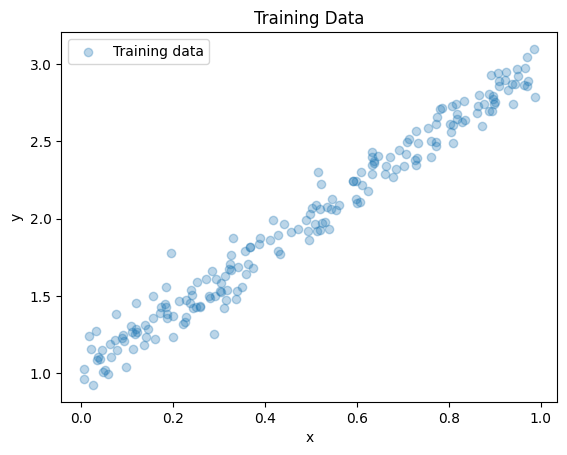

In [ ]:
# Generate synthetic 1D data
nr_points = 200
np.random.seed(42)
x_train = np.random.rand(nr_points, 1)

# True parameters
a_true = 2  # slope
b_true = 1  # intercept
y_train = b_true + a_true * x_train + 0.1 * np.random.randn(nr_points, 1)

# Visualize the training data
plt.scatter(x_train, y_train, alpha=0.3, label='Training data')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Training Data")
plt.legend()
plt.show()


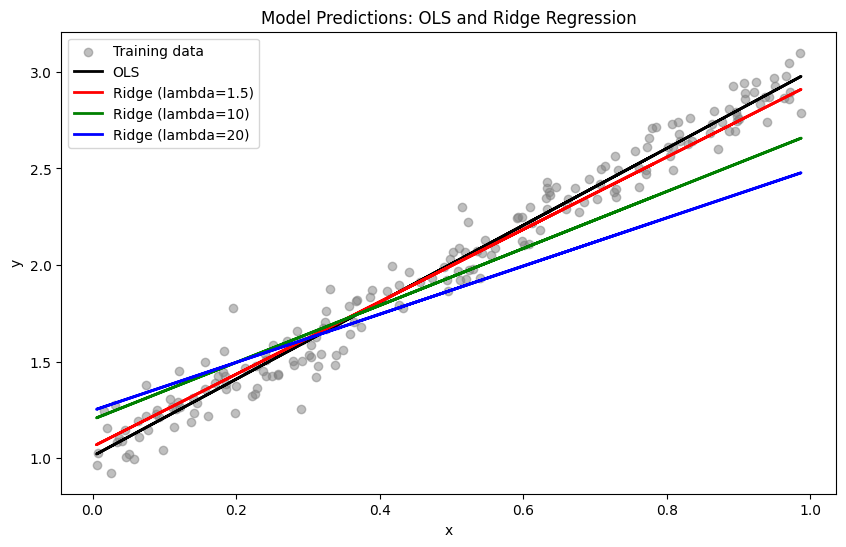

In [ ]:


# (a) Fit ordinary least squares model
ols_model = myLinearRegression1D()
ols_model.fit(x_train, y_train)
y_pred_ols = ols_model.predict(x_train)

# (b) Fit Ridge regression models with various lambda values
lambdas = [1.5, 10, 20]
ridge_predictions = {}
for lam in lambdas:
    ridge_model = MyRidgeRegression1D(lam=lam).fit(x_train, y_train)
    ridge_predictions[lam] = ridge_model.predict(x_train)

# Plot training data and all model predictions
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='gray', alpha=0.5, label='Training data')
plt.plot(x_train, y_pred_ols, label='OLS', linewidth=2, color='black')

colors = ['red', 'green', 'blue']
for i, lam in enumerate(lambdas):
    plt.plot(x_train, ridge_predictions[lam], color=colors[i], label=f'Ridge (lambda={lam})', linewidth=2)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Model Predictions: OLS and Ridge Regression")
plt.legend()
plt.show()

**Searching for parameters**
* **GridSearchCV:** We define a grid of candidate values for
hyperparematers (in our example, only one hyperparameter $\lambda$, below we set it to 0.0001, 0.001, 0.01, 0.1, 0.2, 1, 10, 20) and then use `GridSearchCV` to perform an exhaustive search over these values using 5-fold cross-validation. The scoring is set to negative MSE (since higher scores are considered better by scikit-learn, we take the negative of MSE). The best parameter and its corresponding CV MSE are printed.

In [ ]:
# GridSearchCV Example
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for lambda
param_grid = {'lam': [0.0001, 0.001, 0.01, 0.1, 0.2, 1, 10, 20]}

# Create a GridSearchCV object using 5-fold cross-validation and negative MSE as scoring.
grid_search = GridSearchCV(MyRidgeRegression1D(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

print("GridSearchCV best lambda:", grid_search.best_params_['lam'])
print("GridSearchCV best CV MSE:", -grid_search.best_score_)

best_param_grid = grid_search.best_params_['lam']

GridSearchCV best lambda: 0.01
GridSearchCV best CV MSE: 0.009463968305099785


* **RandomizedSearchCV:** Instead of trying every value, we can also use `RandomizedSearchCV` to sample a fixed number (`n_iter`) of parameter combinations from a given list or distribution. This can be faster if the parameter space is large. We then print the best found $\lambda$ and its CV MSE.

In [ ]:
# RandomizedSearchCV Example
from sklearn.model_selection import   RandomizedSearchCV
from scipy.stats import uniform

# Define a uniform distribution for lambda in the interval [0, 5]
param_dist = {'lam': uniform(0, 5)}

# Create a RandomizedSearchCV object with 100 iterations
random_search = RandomizedSearchCV(MyRidgeRegression1D(), param_dist, cv=5, scoring='neg_mean_squared_error',
                                   n_iter=100, random_state=42)
random_search.fit(x_train, y_train)

print("RandomizedSearchCV best lambda:", random_search.best_params_['lam'])
print("RandomizedSearchCV best CV MSE:", -random_search.best_score_)

best_param_random = random_search.best_params_['lam']

RandomizedSearchCV best lambda: 0.027610585618011996
RandomizedSearchCV best CV MSE: 0.009463652922216471


In [ ]:

# Split the data into training and testing sets (80% train, 20% test)
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(x_train, y_train,
                                                                            test_size=0.2,
                                                                            random_state=42)


#  Fit the OLS model using myLinearRegression1D -----
ols_model = myLinearRegression1D()
ols_model.fit(X_train_split, y_train_split)
y_pred_ols = ols_model.predict(X_test_split)
mse_ols = mean_squared_error(y_test_split, y_pred_ols)

# Fit the model with the best lambda from GridSearchCV
model_grid = MyRidgeRegression1D(lam=best_param_grid)
model_grid.fit(X_train_split, y_train_split)
y_pred_grid = model_grid.predict(X_test_split)
mse_grid = mean_squared_error(y_test_split, y_pred_grid)

# Fit the model with the best lambda from RandomizedSearchCV
model_random = MyRidgeRegression1D(lam=best_param_random)
model_random.fit(X_train_split, y_train_split)
y_pred_random = model_random.predict(X_test_split)
mse_random = mean_squared_error(y_test_split, y_pred_random)

print("Test MSE for OLS (myLinearRegression1D):\t", mse_ols)
print("Test MSE with GridSearchCV best lambda:\t\t", mse_grid)
print("Test MSE with RandomizedSearchCV best lambda:\t", mse_random)

Test MSE for OLS (myLinearRegression1D):	 0.010846238625454698
Test MSE with GridSearchCV best lambda:		 0.010829038729288457
Test MSE with RandomizedSearchCV best lambda:	 0.010799361026980186


# Q1.2 Predicting house pricing

Use the California Housing dataset as follows:

In [ ]:
from sklearn.datasets import fetch_california_housing
import numpy as np

# Load California Housing data
data = fetch_california_housing()
X = data.data      # Features: various housing attributes
y = data.target    # Target: house price (in 100,000's)
print('X.shape = ', X.shape)
print(X[:5])
print(y[:5])

X.shape =  (20640, 8)
[[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]]
[4.526 3.585 3.521 3.413 3.422]


* Q1.2 a) Split the set into test set (25%) and train set (75%) randomly. Use your custom  `myLinearRegression_multiD()` class to fit the model on the training set and predict the house prices on the test set. ompute the Mean Squared Error (MSE) of the predictions on the test set.

* Q1.2 b) Modify the `myLinearRegression_multiD()` class   so that it is compatible with scikit-learn’s cross-validation tools (implement `get_params` and `set_params`). Use `KFold` and `cross_val_score` (with 5 folds) to evaluate the model. Report the average MSE across the folds.

* Q1.2 c) Plot actual vs. predicted house prices on the test set.

* Q1.2 d) Create a histogram of the residuals  (i.e. the differences between the actual and predicted target values) to analyze the error distribution. Use 50 bins.

# Q1.3
*  Analyze coefficients $\beta_0,\ldots,\beta_8$ from previous Q1.2 (California House Pricing). Choose $m\in\{2,4,6\}$ features corresponding to largest absolute values of $\beta_1,\ldots,\beta_8$. Then consider dimensionality reduction: Let $\mathbf{x}_i'$ be $m$ features of 8D $\mathbf{x}_i$. Perform on fixed train-test split compare model trained on full data with models trained on data tailored to $m$ "best" features.